# Solving the equations of motion for a binary system
Unlike the previous code where we derived the equations for velocities, here we will solve the very first equation of motion which are second order differential equations and determine the motion of the stars.

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const
import astropy.units as u
import numpy as np

The masses are being taken in solar mass units(represented by ${M}_\odot$), distances in Astronimcal Units, the time in years and velocities in $\frac{km}{s}$. We have:

$$1{M}_\odot=1.98847\times10^{30}\:Kg$$

$$1 AU = 149597870700\:m$$

In [3]:
m1=float(input("1st mass: "))*u.M_sun
m2=float(input("2nd mass: "))*u.M_sun
x0=float(input("Initial x-coordinate of 1st star: "))*u.AU
y0=float(input("Initial y-coordinate of 1st star: "))*u.AU
u0=float(input("Initial x-velocity of 1st star: "))*u.km/u.s
v0=float(input("Initial y-velocity of 1st star: "))*u.km/u.s
P=float(input("Time scale: "))*u.year

1st mass: 6
2nd mass: 2
Initial x-coordinate of 1st star: -0.1
Initial y-coordinate of 1st star: 0
Initial x-velocity of 1st star: 0
Initial y-velocity of 1st star: -45.89
Time scale: 2.79


We have following to second order ODEs for the first star which determine the motion in X-Y plane:

$$\frac{d^2x}{dt^2}=-\frac{Gm_2^3x}{(m_1+m_2)\sqrt{(x^2+y^2)^3}}$$

$$\frac{d^2y}{dt^2}=-\frac{Gm_2^3y}{(m_1+m_2)\sqrt{(x^2+y^2)^3}}$$

To solve the two equations using `scipy.integrate.odeint` we need to break each equation into two second order equations. So we introduce two variables $u$ and $v$ so that we have following four equations:

$$\frac{dx}{dt}=u$$

$$\frac{du}{dt}=-\frac{Gm_2^3x}{(m_1+m_2)\sqrt{(x^2+y^2)^3}}$$

$$\frac{dy}{dt}=v$$

$$\frac{dv}{dt}=-\frac{Gm_2^3y}{(m_1+m_2)\sqrt{(x^2+y^2)^3}}$$

In [4]:
def deri(state,t):
    G=const.G.value
    M1=m1.to('kg').value
    M2=m2.to('kg').value
    x=state[0]
    y=state[1]
    u=state[2]
    v=state[3]
    M=M1+M2
    r=np.sqrt(x*x+y*y)
    k=G*(M2**3)/((M**2)*(r**3))
    return[u,v,-k*x,-k*y]
t = np.linspace(0,P.to('s').value,1000000)
init=[x0.to('m').value,y0.to('m').value,u0.to('m/s').value,v0.to('m/s').value]
sol=odeint(deri,init,t)

We know orbital velocity is given by:

$$v_1=\sqrt{v_x^2+v_y^2}$$

and using the relation $m_1v_1=m_2v_2$, we have:

$$v_2=\frac{m_1v_1}{m_2}$$

In [5]:
x=sol[:,0]*u.m
y=sol[:,1]*u.m
vx=sol[:,2]*u.m/u.s
vy=sol[:,3]*u.m/u.s
v1=np.sqrt(vx**2+vy**2)
v2=m1*v1/m2

And now we plot the velocities against time.

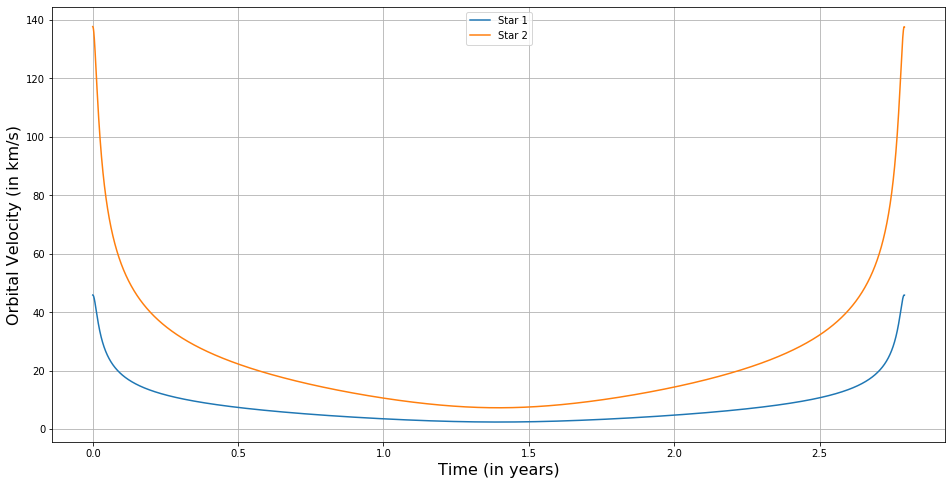

In [6]:
plt.figure(figsize=(16,8))
plt.plot(t/31536000,v1.to('km/s').value,label='Star 1')
plt.plot(t/31536000,v2.to('km/s').value,label='Star 2')
plt.ylabel("Orbital Velocity (in km/s)",fontsize=16)
plt.xlabel("Time (in years)",fontsize=16)
plt.grid()
plt.legend(loc='upper center')

We have also obtained the respective XY coordinates with for given time instants hence we can plot the orbits of the two stars.
We use the relations $m_1x_1=-m_2x_2$ and $m_1y_1=-m_2y_2$ to obtain the coordinates of the other star, thus:

$$x_2=-\frac{m_1x_1}{m_2}$$

$$y_2=-\frac{m_1y_1}{y_2}$$

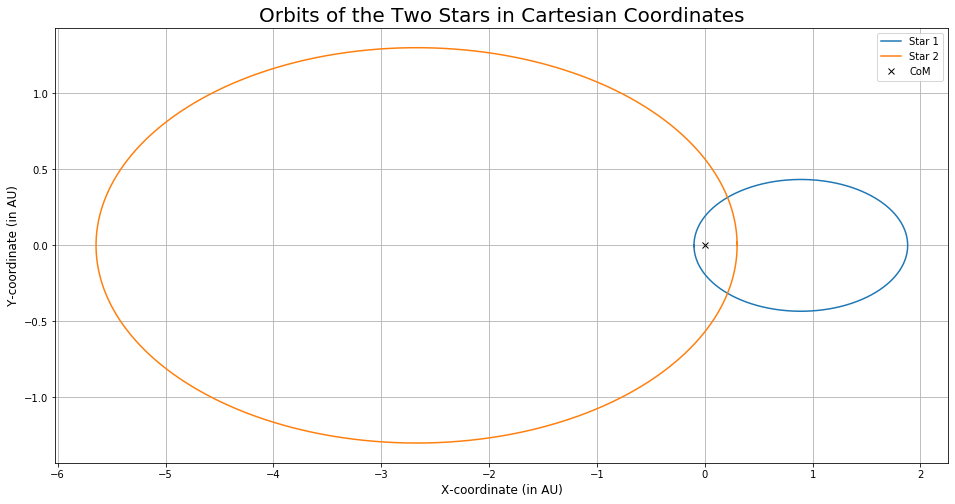

In [7]:
plt.figure(figsize=(16,8))
plt.plot(x.to('AU').value,y.to('AU').value,label='Star 1')
plt.plot(-m1*(x.to('AU').value)/m2,-m1*(y.to('AU').value)/m2,label='Star 2')
plt.plot(0,0,'x',c='black',label='CoM')
plt.title("Orbits of the Two Stars in Cartesian Coordinates",fontsize=20)
plt.ylabel("Y-coordinate (in AU)",fontsize=12)
plt.xlabel("X-coordinate (in AU)",fontsize=12)
plt.legend(loc='upper right')
plt.grid()